In [1]:
# Import libraries
import pandas as pd
import seaborn as sns
from scipy import stats
import pylab as py 
import numpy as np
from sklearn.linear_model import LinearRegression
import scipy.stats as scs
from sklearn.model_selection import train_test_split 

In [2]:
# Import data
student_perform = pd.read_csv("StudentsPerformance.csv")

In [3]:
# Home task: 
# explore whether there are any dependences between reading/writing/math_scores
# and 
# find out whether student's race or/and paretns' level_of_education influences lunch_type of their children
# and 
# attach all proving plots

In [4]:
# See data
student_perform.tail(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [5]:
# Make colnames look good
student_perform.columns = [x.replace(" ", "_") for x in student_perform.columns]
student_perform.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
scores = [i for i in list(student_perform) if "score" in i]

In [7]:
# Just markes
student_perform.filter(like="score")

,math_score,reading_score,writing_score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
5,71,83,78
6,88,95,92
7,40,43,39
8,64,64,67
9,38,60,50


In [8]:
# Shapiro tests for data
# P-values are small, so we can't reject the null-hypothesis
score = student_perform.filter(like="score")
print(stats.shapiro(score[['math_score']]))
print(stats.shapiro(score[['reading_score']]))
print(stats.shapiro(score[['writing_score']]))

(0.9931505918502808, 0.00014530023327097297)
(0.9929210543632507, 0.0001056220498867333)
(0.9919633269309998, 2.9172901122365147e-05)


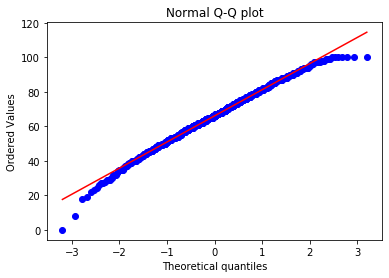

In [9]:
# Additional qq plot,cause there is a lot of rows in df, so shapiro test isn't enough
stats.probplot(score.math_score, dist="norm", plot=py)
py.title("Normal Q-Q plot")
py.show()

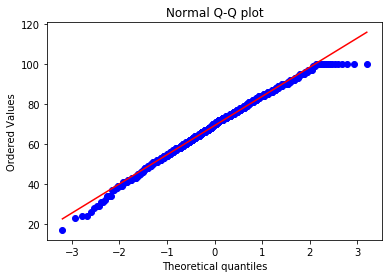

In [10]:
# Data looks like normal
stats.probplot(score.reading_score, dist="norm", plot=py)
py.title("Normal Q-Q plot")
py.show()

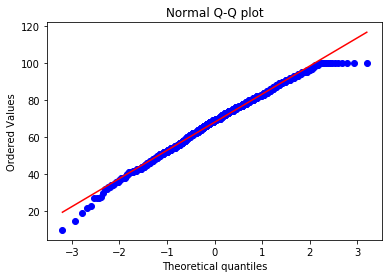

In [11]:
# Data looks like normal
stats.probplot(score.writing_score, dist="norm", plot=py)
py.title("Normal Q-Q plot")
py.show()

               math_score  reading_score  writing_score
math_score       1.000000       0.817580       0.802642
reading_score    0.817580       1.000000       0.954598
writing_score    0.802642       0.954598       1.000000


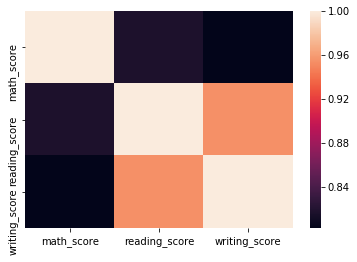

In [12]:
# Pearson correlations between markes
# Wee can see a high correlation between reading and writing
print(student_perform.filter(like="score").corr())
sns.heatmap(student_perform.filter(like="score").corr())

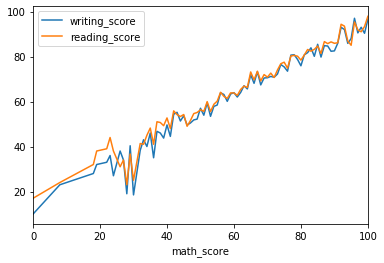

In [13]:
# Let's see a graph. Also writing and reading scores look similar
# If student has high score in math - he also has high score in other subjects (but there is a 'fluctuation' between 20 and 40)
math = student_perform.groupby(['math_score'])\
    .aggregate({'writing_score': 'mean', 'reading_score': 'mean'})
math.plot.line()

In [14]:
#Assumpyions for linear regression:
#Linear relationship - will check
#Multivariate normality - data has normal distribution
#No or little multicollinearity
#No auto-correlation
#Homoscedasticity

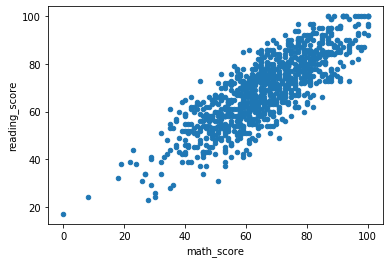

In [15]:
# Let's explore graphs. Looks like linear, but not enough
student_perform.plot.scatter(x='math_score', y='reading_score')

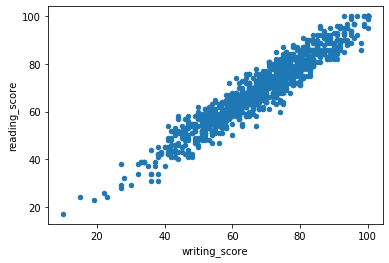

In [16]:
# Due to high correlation between reading and writing scores - looks like a good linear dependance
student_perform.plot.scatter(x='writing_score', y='reading_score')

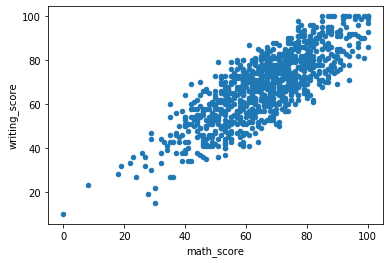

In [17]:
# The same as in the first case
student_perform.plot.scatter(x='math_score', y='writing_score')

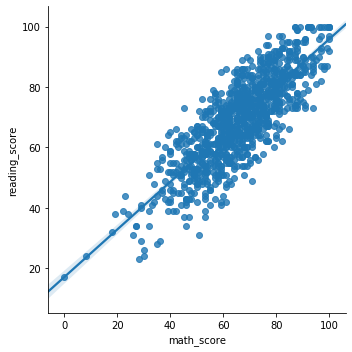

In [18]:
sns.lmplot(x='math_score', y='reading_score', data=student_perform) 

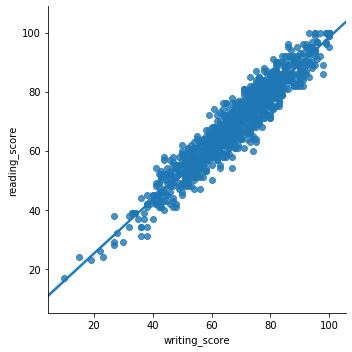

In [19]:
# We can see linear dependence 
sns.lmplot(x='writing_score', y='reading_score', data=student_perform) 

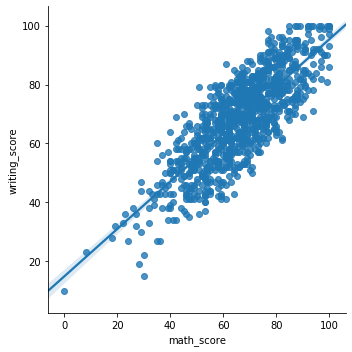

In [20]:
sns.lmplot(x='math_score', y='writing_score', data=student_perform) 

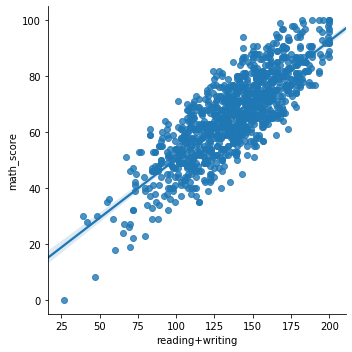

In [21]:
student_perform['reading+writing'] = student_perform['reading_score'] + student_perform['writing_score']
sns.lmplot(x='reading+writing', y='math_score', data=student_perform)

In [22]:
# R^2 isn't good enough, so i decided not to make a prediction
model = LinearRegression().fit(np.array(score.math_score).reshape(-1, 1), np.array(score.writing_score))
r_sq = model.score(np.array(score.math_score).reshape(-1, 1), np.array(score.writing_score))
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

coefficient of determination: 0.6442342539264932
intercept: 14.894224270018505
slope: [0.80436647]


In [23]:
# The same
model = LinearRegression().fit(np.array(score.math_score).reshape(-1, 1), np.array(score.reading_score))
r_sq = model.score(np.array(score.math_score).reshape(-1, 1), np.array(score.reading_score))
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

coefficient of determination: 0.6684365064501091
intercept: 17.141806785685283
slope: [0.78722924]


In [24]:
# The good one
model = LinearRegression().fit(np.array(score.writing_score).reshape(-1, 1), np.array(score.reading_score))
r_sq = model.score(np.array(score.writing_score).reshape(-1, 1), np.array(score.reading_score))
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

coefficient of determination: 0.9112574888913136
intercept: 6.7505047358757295
slope: [0.91719069]


coefficient of determination: 0.9112574888913136
intercept: 6.7505047358757295
slope: [0.91719069]
     Actual  Predicted
0        72  74.648948
1        73  72.826320
2        46  52.777408
3        62  65.535806
4        78  76.471576
5        72  70.092377
6        69  75.560262
7        43  45.486895
8        87  81.028147
9        34  40.019010
10       48  54.600036
11       70  71.003691
12       81  79.205519
13       80  80.116833
14       56  60.067921
15       41  46.398209
16       48  53.688722
17       91  86.496032
18       53  60.067921
19       78  81.028147
20       65  62.801864
21       59  58.245293
22       76  80.116833
23       60  59.156607
24       46  47.309523
25       65  62.801864
26       54  59.156607
27       44  50.043465
28       72  65.535806
29       90  87.407346
..      ...        ...
170      61  60.067921
171      68  73.737634
172      39  37.285067
173      68  71.003691
174      83  89.229975
175      72  66.447120
176      68  67.358435
177 

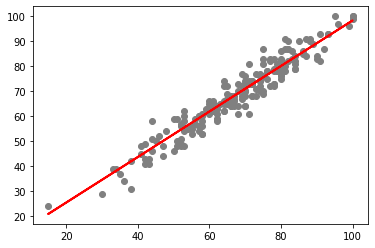

In [25]:
# So let's make a prediction
import matplotlib.pyplot as plt  
X = score['writing_score'].values.reshape(-1,1)
y = score['reading_score'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor = LinearRegression()  
regressor.fit(X_train, y_train)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
print(df)
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [26]:
# To see all needed parameters for the second task
parents = student_perform.groupby(["parental_level_of_education", "lunch", "race/ethnicity"]).count()
parents.head(20)

gender  \
parental_level_of_education lunch        race/ethnicity           
associate's degree          free/reduced group A              7   
                                         group B             14   
                                         group C             22   
                                         group D             21   
                                         group E             13   
                            standard     group A              7   
                                         group B             27   
                                         group C             56   
                                         group D             29   
                                         group E             26   
bachelor's degree           free/reduced group A              2   
                                         group B              9   
                                         group C             15   
                                         group D             14   
                                         group E              4   
                            standard     group A             10   
                                         group B             11   
                                         group C             25   
                                         group D             14   
                                         group E             14   

                                                         test_preparation_course  \
parental_level_of_education lunch        race/ethnicity                            
associate's degree          free/reduced group A                               7   
                                         group B                              14   
                                         group C                              22   
                                         group D                              21   
                                         group E                              13   
                            standard     group A                               7   
                                         group B                              27   
                                         group C                              56   
                                         group D                              29   
                                         group E                              26   
bachelor's degree           free/reduced group A                               2   
                                         group B                               9   
                                         group C                              15   
                                         group D                              14   
                                         group E                               4   
                            standard     group A                              10   
                                         group B                              11   
                                         group C                              25   
                                         group D                              14   
                                         group E                              14   

                                                         math_score  \
parental_level_of_education lunch        race/ethnicity               
associate's degree          free/reduced group A                  7   
                                         group B                 14   
                                         group C                 22   
                                         group D                 21   
                                         group E                 13   
                            standard     group A                  7   
                                         group B                 27   
                                         group C                 56   
                       

In [27]:
parents = student_perform.groupby(["lunch", "parental_level_of_education", "race/ethnicity"]).count()
parents = parents[["gender"]]
parents = parents.rename(columns={"gender": "count"})
parents

count
lunch        parental_level_of_education race/ethnicity       
free/reduced associate's degree          group A             7
                                         group B            14
                                         group C            22
                                         group D            21
                                         group E            13
             bachelor's degree           group A             2
                                         group B             9
                                         group C            15
                                         group D            14
                                         group E             4
             high school                 group A             7
                                         group B            16
                                         group C            23
                                         group D            16
                                         group E             8
             master's degree             group A             2
                                         group B             4
                                         group C            10
                                         group D             5
                                         group E             3
             some college                group A             7
                                         group B            16
                                         group C            23
                                         group D            26
                                         group E             7
             some high school            group A            11
                                         group B            10
                                         group C            21
                                         group D            13
                                         group E             6
standard     associate's degree          group A             7
                                         group B            27
                                         group C            56
                                         group D            29
                                         group E            26
             bachelor's degree           group A            10
                                         group B            11
                                         group C            25
                                         group D            14
                                         group E            14
             high school                 group A            11
                                         group B            32
                                         group C            41
                                         group D            28
                                         group E            14
             master's degree             group A             1
                                         group B             2
                                         group C             9
                                         group D            18
                                         group E             5
             some college                group A            11
                                         group B            21
                                         group C            46
                                         group D            41
                                         group E            28
             some high school            group A            13
                                         group B            28
                                         group C            28
                                         group D            37
                                         group E            12

In [28]:
parents10 = parents.reset_index()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A6F4739048>]],
      dtype=object)

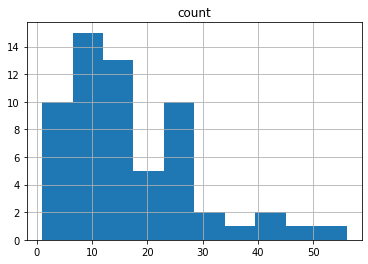

In [29]:
# Isn't normal distributed
parents10.hist()

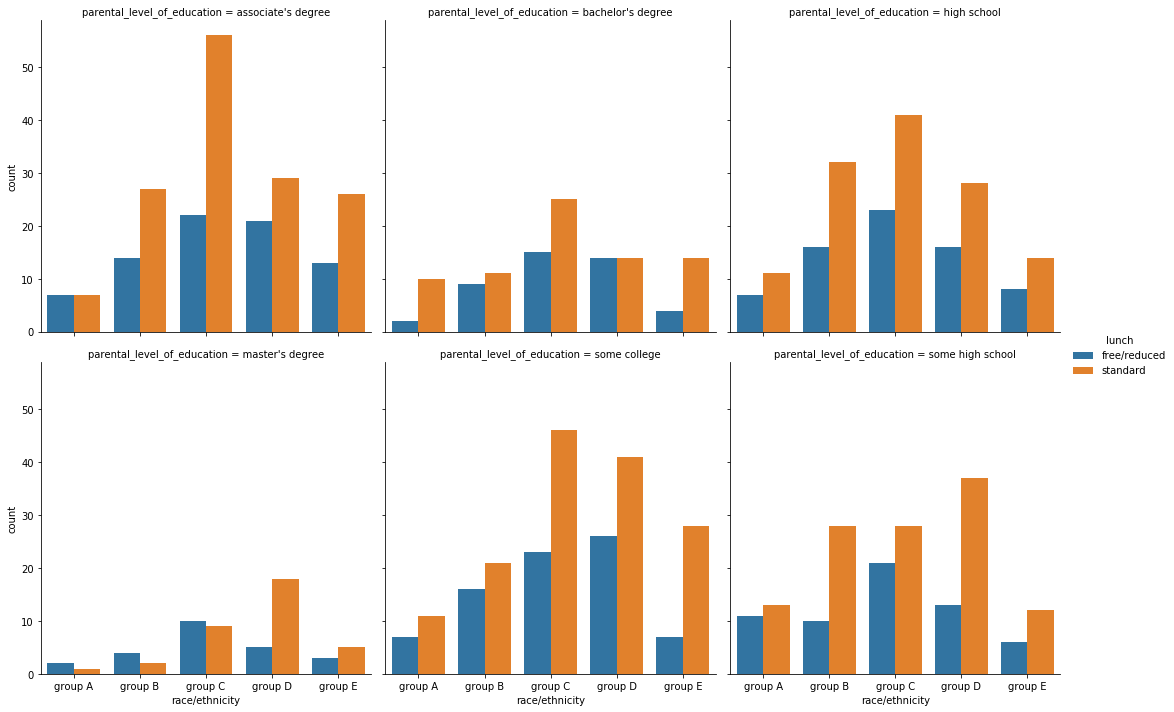

In [30]:
sns.catplot(x='race/ethnicity', y='count', hue = 'lunch', col="parental_level_of_education", col_wrap=3, 
            kind="bar", data=parents.reset_index())

In [31]:
# Chi-square
# P-value is large - we can't see a dependence
parents = pd.crosstab(index = [student_perform['race/ethnicity'], 
                            student_perform['parental_level_of_education']], 
                            columns = student_perform['lunch'])
chi, p, df, expect = scs.chi2_contingency(parents)
print(f' Chi squared test p-value: {p}')

 Chi squared test p-value: 0.41050056464171486


In [32]:
race = pd.crosstab(index = student_perform['race/ethnicity'], 
                         columns = student_perform['lunch'])
print(race)
chi, p, df, expect = scs.chi2_contingency(race)
print(f' Chi squared test p-value: {p}')

lunch           free/reduced  standard
race/ethnicity                        
group A                   36        53
group B                   69       121
group C                  114       205
group D                   95       167
group E                   41        99
 Chi squared test p-value: 0.48669808284196503


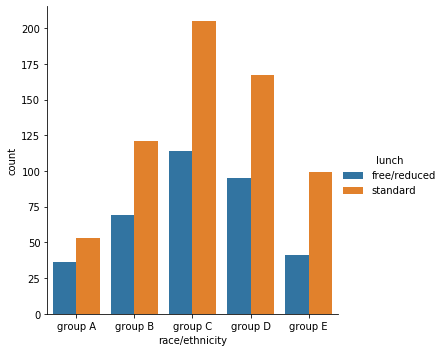

In [33]:
race = student_perform.groupby(["lunch", "race/ethnicity"]).count()
race = race[["gender"]]
race = race.rename(columns={"gender": "count"})
sns.catplot(x='race/ethnicity', y='count', hue = 'lunch', 
           kind="bar", data=race.reset_index())

In [34]:
education = pd.crosstab(index = student_perform['parental_level_of_education'], 
                              columns = student_perform['lunch'])
print(education)
chi, p, df, expect = scs.chi2_contingency(education)
print(f' Chi squared test p-value: {p}')

lunch                        free/reduced  standard
parental_level_of_education                        
associate's degree                     77       145
bachelor's degree                      44        74
high school                            70       126
master's degree                        24        35
some college                           79       147
some high school                       61       118
 Chi squared test p-value: 0.9531014927218224


<Figure size 1440x360 with 0 Axes>

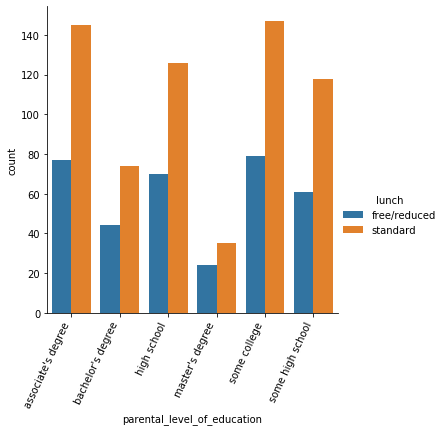

In [35]:
education = student_perform.groupby(["lunch", "parental_level_of_education"]).count()
education = education[["gender"]]
education = education.rename(columns={"gender": "count"})
plt.figure(figsize=(20,5))
chart=sns.catplot(x='parental_level_of_education', y='count', hue = 'lunch', 
           kind="bar", data=education.reset_index())
chart.set_xticklabels(rotation=65, horizontalalignment='right')